In [17]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA
from MulticoreTSNE import MulticoreTSNE as TSNE
from scipy.stats import spearmanr as scor

from other_functions import *

## Additional analysis
Creating PCA of normalised CTRP-L1000 data and t-SNE

In [2]:
sig_info=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                       sep=',',header=0,index_col=[0])
signatures=pd.read_table('../results/CTRP/signatures_merged_lm.csv',
                         sep=',',header=0,index_col=[0])

In [3]:
# gene and sample wise normalisation
signatures_gene_norm=(signatures-np.mean(signatures))/np.std(signatures)
signatures_samp_norm=((signatures.T-np.mean(signatures,1))/np.std(signatures,1)).T

In [4]:
#do the pca
model=PCA(2,random_state=19890904)
signatures_pca=pd.DataFrame(model.fit_transform(signatures_gene_norm),
                            index=signatures_gene_norm.index)
evr1,evr2=model.explained_variance_ratio_.round(3).astype(str)
signatures_pca.columns=['PC1\nexplained variance ratio: '+evr1,
                      'PC2\nexplained variance ratio: '+evr2]
signatures_pca.to_csv('../results/model/dimension_reduction/pca_gene.csv',
                      sep=',')
signatures_pca=pd.DataFrame(model.fit_transform(signatures_samp_norm),
                            index=signatures_samp_norm.index)
evr1,evr2=model.explained_variance_ratio_.round(3).astype(str)
signatures_pca.columns=['PC1\nexplained variance ratio: '+evr1,
                      'PC2\nexplained variance ratio: '+evr2]
signatures_pca.to_csv('../results/model/dimension_reduction/pca_sample.csv',
                      sep=',')

In [16]:
#we can do also do for dimensionality reduction t-SNE, with different perplexities
#takes some time
perplexities=[10,20,50,100]
for perp in perplexities:
    model=TSNE(n_components=2,perplexity=perp,n_jobs=8,random_state=19890904)
    signatures_tsne=pd.DataFrame(model.fit_transform(signatures),
                                 index=signatures.index,columns=['Dim1','Dim2'])
    signatures_tsne.to_csv('../results/model/dimension_reduction/tsne_%i.csv' % perp,
                          sep=',')
    signatures_tsne=pd.DataFrame(model.fit_transform(signatures_gene_norm),
                                 index=signatures_gene_norm.index,columns=['Dim1','Dim2'])
    signatures_tsne.to_csv('../results/model/dimension_reduction/tsne_gene_%i.csv' % perp,
                          sep=',')
    signatures_tsne=pd.DataFrame(model.fit_transform(signatures_samp_norm),
                                 index=signatures_samp_norm.index,columns=['Dim1','Dim2'])
    signatures_tsne.to_csv('../results/model/dimension_reduction/tsne_sample_%i.csv' % perp,
                          sep=',')

Spearman Rho with X: SpearmanrResult(correlation=-0.23042528242680105, pvalue=2.084640582721842e-224)
Spearman Rho with Y: SpearmanrResult(correlation=-0.23598557933827391, pvalue=1.395465496038267e-235)


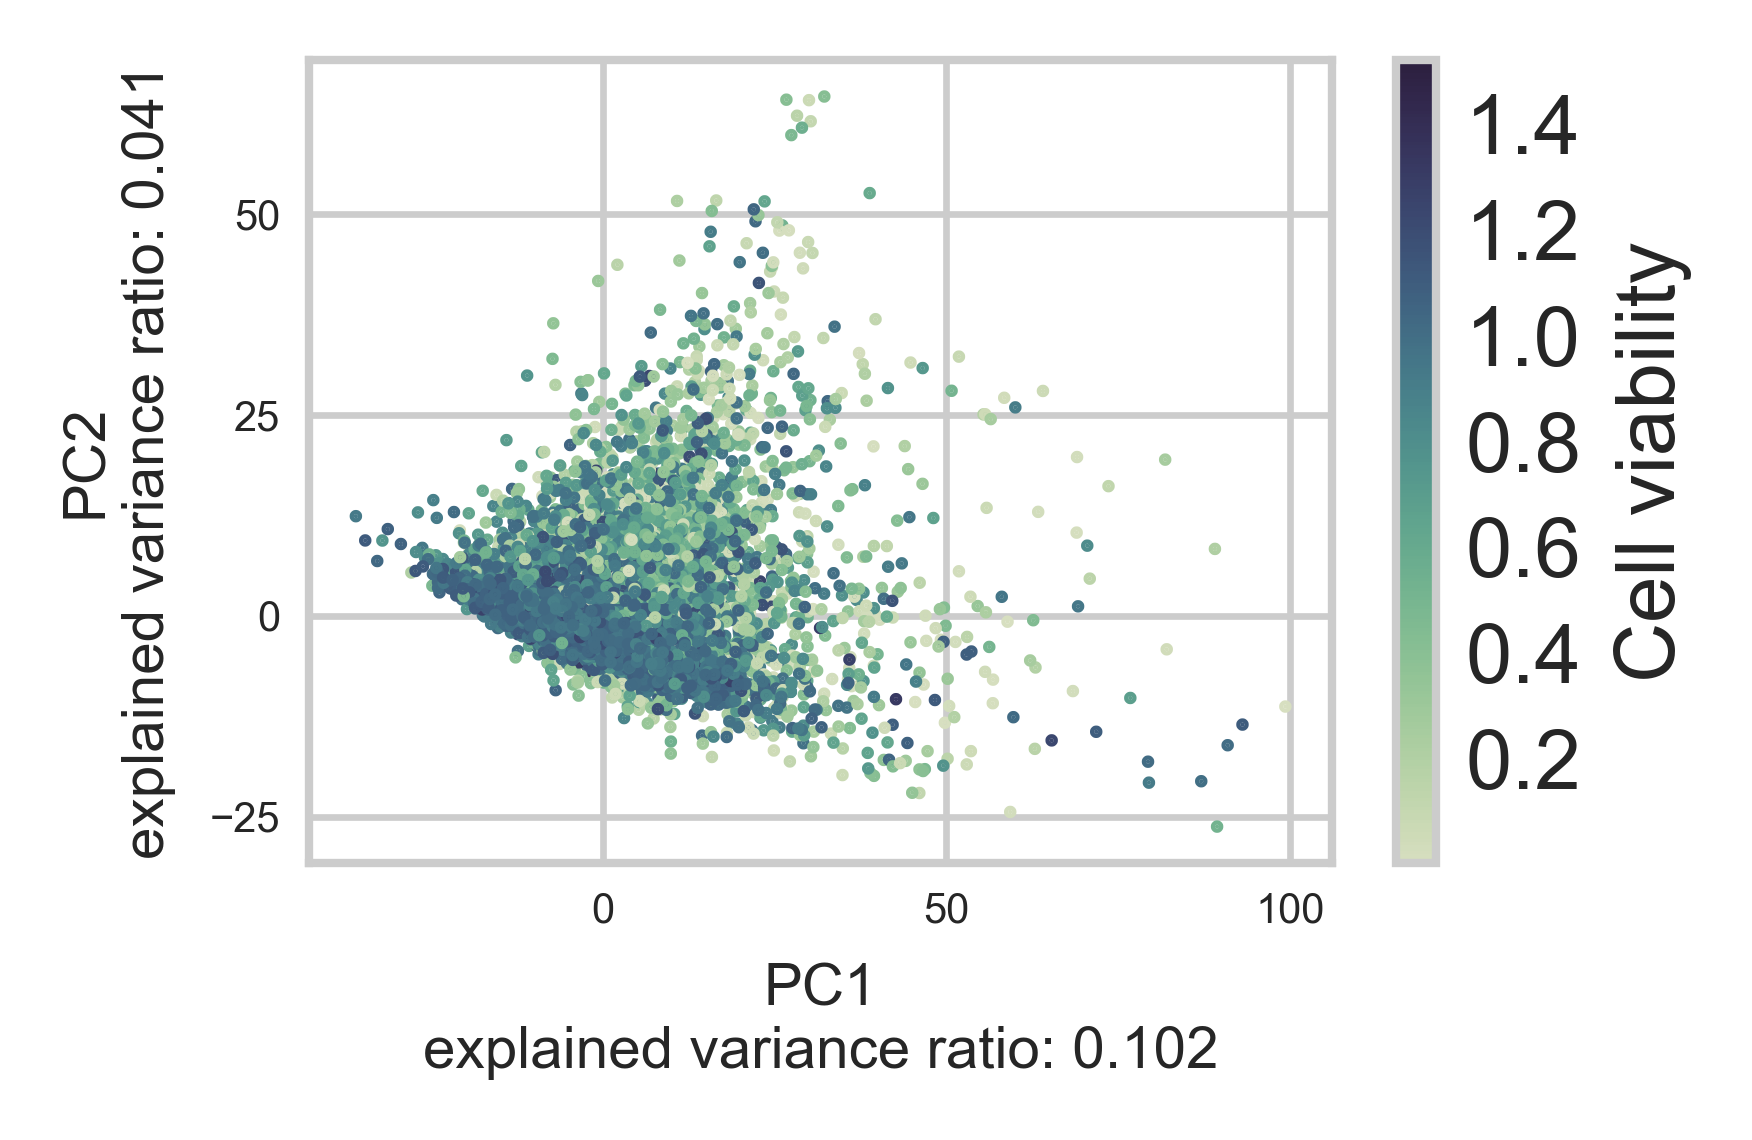

In [22]:
#let's make a PCA of gene wise normalized signautres
#it is not very different from not normalized signatures
#as we already used z scores
sig_data=pd.read_table('../results/model/dimension_reduction/pca_gene.csv',
                       sep=',',header=0,index_col=[0])
sig_info=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                       sep=',',header=0,index_col=[0])
make_dim_reduc_plot(sig_data,sig_info)

Spearman Rho with X: SpearmanrResult(correlation=0.18130760601063828, pvalue=2.7901576288003937e-138)
Spearman Rho with Y: SpearmanrResult(correlation=-0.35586253009114494, pvalue=0.0)


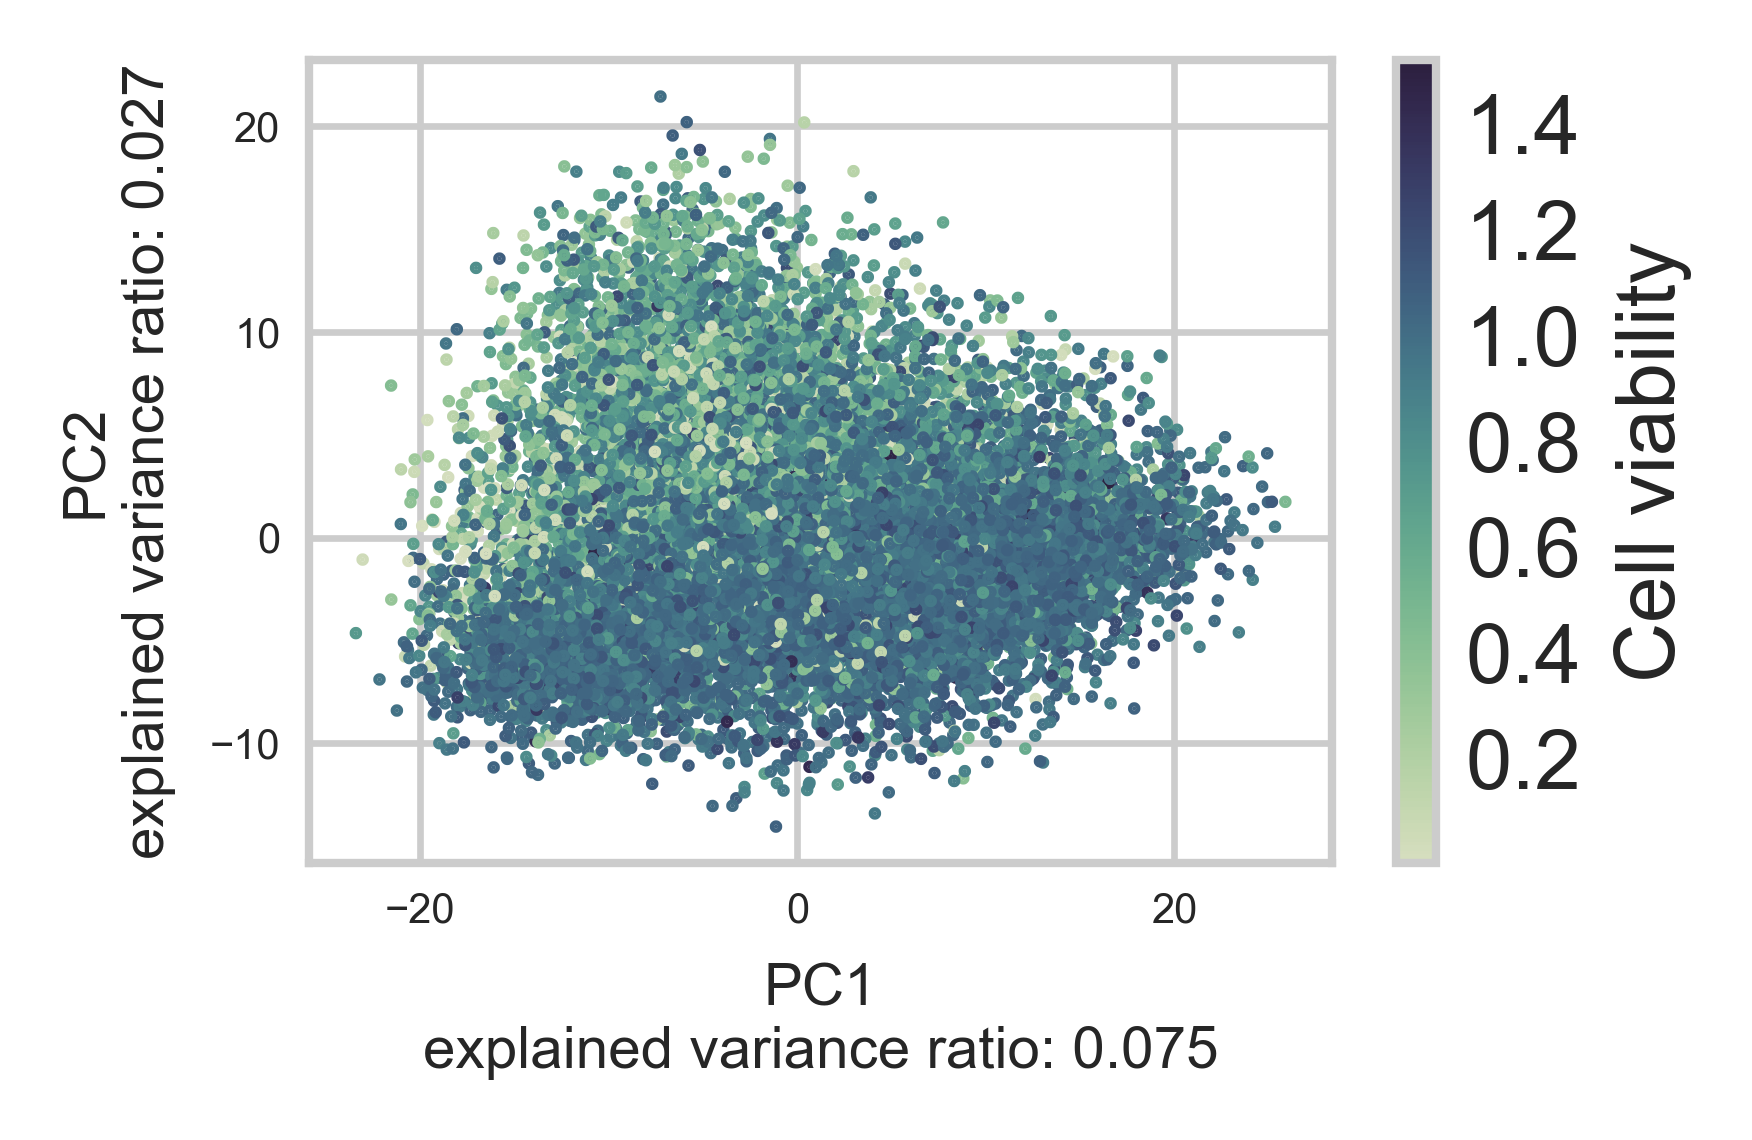

In [27]:
#let's make a PCA of sample wise normalized signautres
sig_data=pd.read_table('../results/model/dimension_reduction/pca_sample.csv',
                       sep=',',header=0,index_col=[0])
sig_info=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                       sep=',',header=0,index_col=[0])
make_dim_reduc_plot(sig_data,sig_info)

Spearman Rho with X: SpearmanrResult(correlation=-0.25592834770602918, pvalue=3.97951249374301e-278)
Spearman Rho with Y: SpearmanrResult(correlation=-0.28439708301171152, pvalue=0.0)


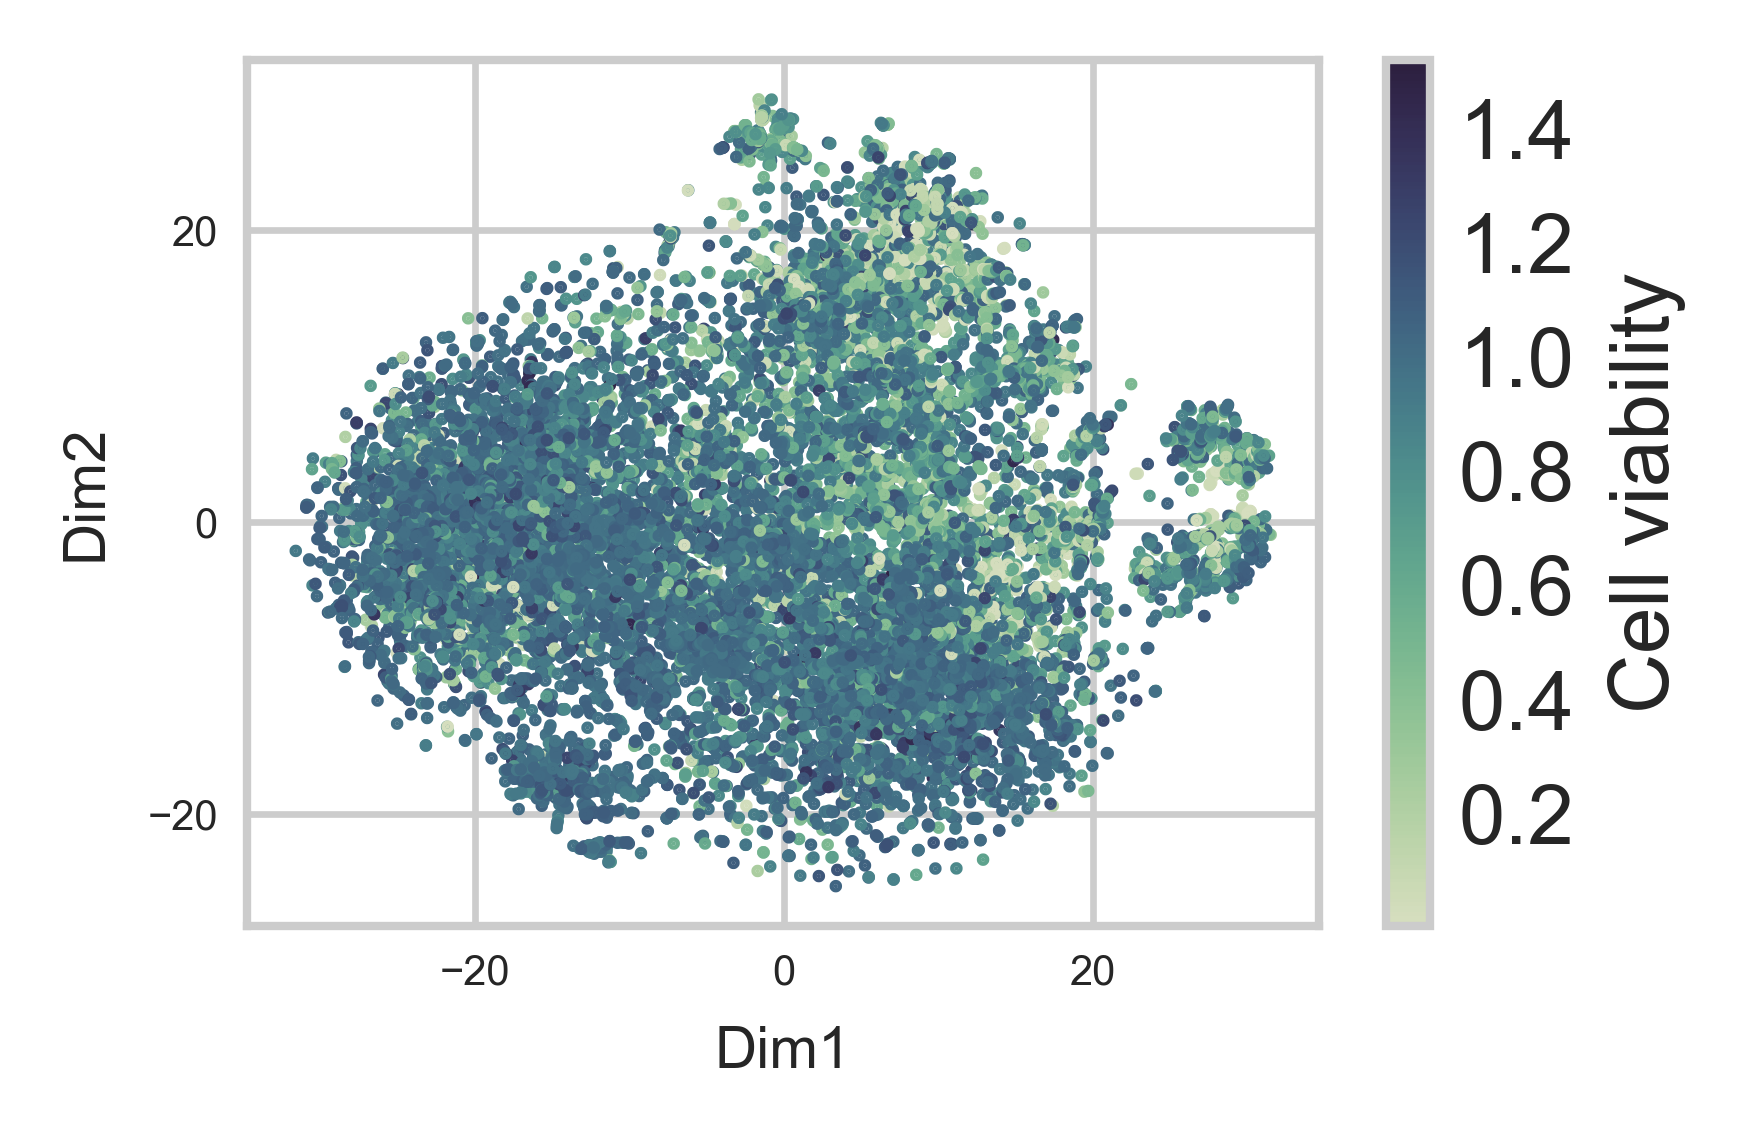

In [40]:
#let's make a t-SNE plot
sig_data=pd.read_table('../results/model/dimension_reduction/tsne_sample_100.csv',
                       sep=',',header=0,index_col=[0])
sig_info=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                       sep=',',header=0,index_col=[0])
sig_info['bin_viability']='Cell viability<=0.8'
fil=sig_info['cpd_avg_pv']>0.8
sig_info.loc[sig_info.index[fil],'bin_viability']='Cell viability>0.8'
make_dim_reduc_plot(sig_data,sig_info)